In [1]:
import numpy

In [2]:
def NN(m1, m2, w1, w2, b):
    z = m1 * w1 + m2 * w2 + b
    return sigmoid(z)

def sigmoid(x):
    return 1/(1 + numpy.exp(-x))

In [3]:
w1 = numpy.random.randn()
w2 = numpy.random.randn()
b = numpy.random.randn()
NN(3, 1.5, w1, w2, b)

In [5]:
phrases = ['看起來像', '我猜是', '可能是', '看起來是', '猜測....']
data = [[3, 1.5, 1], [2, 1, 0], [4, 1.5, 1], [3.5, 5, 1], [2, 0.5, 0], [5.5, 1, 1]]

In [29]:
rand_data = data[numpy.random.randint(len(data))]
m1 = rand_data[0]
m2 = rand_data[1]
prediction = NN(m1, m2, w1, w2, b)
prediction_text = ['藍色','紅色'][int(numpy.round(prediction))]
result = numpy.random.choice(phrases) + "" + prediction_text
result

'猜測....紅色'

In [30]:
a = '真的是' + ['藍色','紅色'][rand_data[2]]
a

'真的是紅色'

In [109]:
import numpy as np

In [110]:
X = np.array( [[1,0,1,0], [1,0,1,1], [0,1,0,1]] )
y = np.array ( [[1], [1], [0]] )

In [111]:
def sigmoid(x):
    return 1/(1 + numpy.exp(-x)) 
def derivatives_sigmoid(x):
    return x * (1 - x)

In [112]:
#Variable initialization
epoch = 10000
lr = 0.1 
inputlayer_neurons = X.shape[1]
hiddenlayer_neurons = 10
output_neurons = 1

In [113]:
wh = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
bh = np.random.uniform(size=(1, hiddenlayer_neurons))
wout = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))

In [114]:
for i in range(epoch):
    #Forward Propogation
    hidden_layer_input1 = np.dot(X, wh)
    hidden_layer_input = hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input1 = np.dot(hiddenlayer_activations, wout)
    output_layer_input = output_layer_input1 + bout
    output = sigmoid(output_layer_input)
    
    #Backpropagation
    E = y-output
    numpy_E = np.array(E)
    Loss_E = np.sum((numpy_E)**2)/len(numpy_E) 
    back_output_layer = derivatives_sigmoid(output)
    back_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
    d_output = Loss_E * back_output_layer
    Error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * back_hidden_layer
    wout += hiddenlayer_activations.T.dot(d_output) * lr
    bout += np.sum(d_output, axis=0, keepdims=True) * lr
    wh += X.T.dot(d_hiddenlayer) * lr
    bh += np.sum(d_hiddenlayer, axis=0, keepdims=True) * lr
    if i % 1000 == 0:
        print("Epoch:{} loss {}".format(i, Loss_E))
        
print('actual:\n', y, '\n')
print('predicted:\n', output)

Epoch:0 loss 0.32009648894767634
Epoch:1000 loss 0.33235183468554513
Epoch:2000 loss 0.33282039377797695
Epoch:3000 loss 0.3329853587525196
Epoch:4000 loss 0.33306975893614726
Epoch:5000 loss 0.33312108206030816
Epoch:6000 loss 0.3331556080726504
Epoch:7000 loss 0.3331804335455468
Epoch:8000 loss 0.3331991485486095
Epoch:9000 loss 0.33321376501259126
actual:
 [[1]
 [1]
 [0]] 

predicted:
 [[0.99987156]
 [0.9999246 ]
 [0.99983821]]


In [108]:
## neural network in pytorch
import torch
import numpy as np

#Input array
X = torch.Tensor([[1,0,1,0],[1,0,1,1],[0,1,0,1]])

#Output
y = torch.Tensor([[1],[1],[0]])

#Sigmoid Function
def sigmoid (x):
  return 1/(1 + torch.exp(-x))

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Variable initialization
epoch=1000 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = X.shape[1] #number of features in data set
hiddenlayer_neurons = 10 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer

#weight and bias initialization
wh=torch.randn(inputlayer_neurons, hiddenlayer_neurons).type(torch.FloatTensor)
bh=torch.randn(1, hiddenlayer_neurons).type(torch.FloatTensor) #1=size
wout=torch.randn(hiddenlayer_neurons, output_neurons)
bout=torch.randn(1, output_neurons)#1=size

#wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons)) #均勻分布
#bh=np.random.uniform(size=(1,hiddenlayer_neurons))
#wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
#bout=np.random.uniform(size=(1,output_neurons))

for i in range(epoch):

  #Forward Propogation
  #torch.mm This function does not broadcast. For broadcasting matrix products, see torch.matmul().
  hidden_layer_input1 = torch.mm(X, wh) # torch.mm = np.dot
  hidden_layer_input = hidden_layer_input1 + bh
  hidden_layer_activations = sigmoid(hidden_layer_input)
 
  output_layer_input1 = torch.mm(hidden_layer_activations, wout)
  output_layer_input = output_layer_input1 + bout
  output = sigmoid(output_layer_input1)

  #Backpropagation
  E = y-output
  back_output_layer = derivatives_sigmoid(output)
  back_hidden_layer = derivatives_sigmoid(hidden_layer_activations)
  d_output = E * back_output_layer
  Error_at_hidden_layer = torch.mm(d_output, wout.t())
  d_hiddenlayer = Error_at_hidden_layer * back_hidden_layer
  wout += torch.mm(hidden_layer_activations.t(), d_output) *lr
  bout += d_output.sum() *lr
  wh += torch.mm(X.t(), d_hiddenlayer) *lr
  bh += d_output.sum() *lr
 
print('actual :\n', y, '\n')
print('predicted :\n', output)

actual :
 tensor([[1.],
        [1.],
        [0.]]) 

predicted :
 tensor([[0.9654],
        [0.9298],
        [0.0867]])


In [115]:
import torch

In [116]:
t = torch.zeros(2,3)
t

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [117]:
t = torch.rand(2,3)
t

tensor([[0.1113, 0.1290, 0.3423],
        [0.6121, 0.5708, 0.1544]])

In [119]:
y = torch.rand(2,3)
y

tensor([[0.8951, 0.8386, 0.1764],
        [0.7253, 0.9411, 0.4876]])

In [120]:
t.add_(y)
print(t)

tensor([[1.2391, 1.3890, 0.8447],
        [1.9271, 1.7939, 1.1849]])


In [121]:
t = torch.Tensor([1,2,3,4])
t

tensor([1., 2., 3., 4.])

In [124]:
t.view(2,2)

tensor([[1., 2.],
        [3., 4.]])

In [125]:
t1 = torch.Tensor([[1,2], [3,4]])
t1.mul(t1)

tensor([[ 1.,  4.],
        [ 9., 16.]])

In [126]:
t1 = torch.Tensor([[1,2,3], [4,5,6]])
t1.t()

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [127]:
t = torch.Tensor([[1,2], [3,4]])
t[:,-1]

tensor([2., 4.])

In [129]:
#GPU
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x+y

In [131]:
a = np.ones(5)
torch.from_numpy(a)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [132]:
a = torch.FloatTensor(2,3)
a

tensor([[ 0.0000e+00, -2.0000e+00,  6.7160e+13],
        [ 1.0845e-19,  2.8026e-45, -2.0000e+00]])

In [133]:
a.numpy()

array([[ 0.0000000e+00, -2.0000000e+00,  6.7159502e+13],
       [ 1.0844662e-19,  2.8025969e-45, -2.0000000e+00]], dtype=float32)

In [135]:
from torch.autograd import Variable
t = torch.ones(2,3)
v = Variable(t, requires_grad = True)
v.data

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [137]:
x = Variable(torch.FloatTensor([2]), requires_grad =True)
y = x**2 + 4 *x

In [138]:
y.backward()
x.grad

tensor([8.])

In [ ]:
#建立基本CNN神經網路
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        #1為輸入通道、6為輸出、5x5卷積
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #使用 (2, 2) 窗口做最大池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:] 
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

In [159]:
#w2v
import torch
from torch.optim import SGD
from torch.autograd import Variable, profiler
import numpy as np
import torch.functional as F
import torch.nn.functional as F

In [160]:
corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman'
]

In [161]:
words = []
for sentence in corpus:
    for word in sentence.split():
        if word not in words:
            words.append(word)
words

['he', 'is', 'a', 'king', 'she', 'queen', 'man', 'woman']

In [162]:
word2idx = {w:idx for (idx,w) in enumerate(words)}
idx2word = {idx:w for (idx,w) in enumerate(words)}
vocabulary_size = len(word2idx)

In [163]:
word2idx



{'he': 0,
 'is': 1,
 'a': 2,
 'king': 3,
 'she': 4,
 'queen': 5,
 'man': 6,
 'woman': 7}

In [164]:
embedding_dims = 10
windows_size = 2 

In [165]:
def train_generator():
    for sentence in corpus:
        words = sentence.split()
        indices = [word2idx[w] for w in words]
        for i in range(len(indices)):
            # i is center word index
            for w in range(-windows_size, windows_size +1 ):
                context_idx = i + w
                if context_idx < 0 or context_idx >= len(indices) or i == context_idx:
                    continue
                center_vec_one_hot = np.zeros(vocabulary_size)
                center_vec_one_hot[indices[i]] = 1
                context_idx = indices[context_idx]
                yield center_vec_one_hot, context_idx

In [166]:
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad = True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad = True)

In [176]:
for epo in range(8000):
    avg_loss = 0
    samples = 0
    for data, target in train_generator():
        x = Variable(torch.from_numpy(data)).float()
        y_true = Variable(torch.from_numpy(np.array([target])).long())
        samples += len(y_true)
        
        a1 = torch.matmul(W1, x)
        a2 = torch.matmul(W2, a1)
        
        log_softmax = F.log_softmax(a2, dim=0)
        network_pred_dlist = F.softmax(log_softmax, dim=0)
        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        avg_loss += loss.item()
        loss.backward()
        W1.data -= 0.01 * W1.grad.data
        W2.data -= 0.01 * W2.grad.data
        
        W1.grad.data.zero_()
        W2.grad.data.zero_()
        
    if epo % 1000 == 0:
        print(avg_loss / samples)
        
        

1.3891617983579636
1.3881470769643784
1.3872939765453338
1.3865663260221481
1.3859441101551055
1.3854150921106339
1.3849694639444352
1.3845967710018159


In [178]:
%matplotlib inline
from scikitplot.decomposition import plot_pca_2d_projection
from sklearn.decomposition import PCA

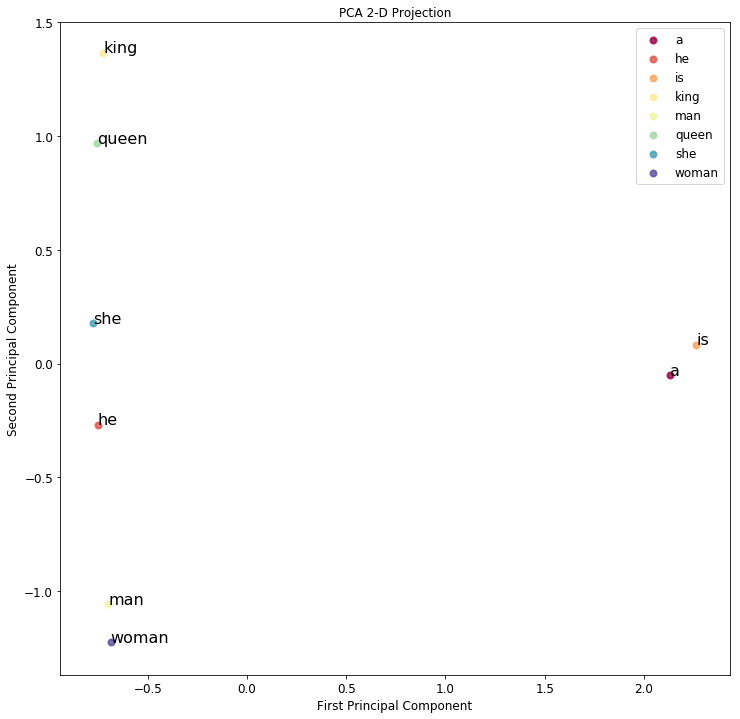

In [179]:
pca = PCA(n_components=2)
pca.fit(W1.data.numpy().T)
proj = pca.transform(W1.data.numpy().T)
ax = plot_pca_2d_projection(pca, W1.data.numpy().T, np.array(words), feature_labels=words, figsize=(12,12), text_fontsize=12) 
for i, txt in enumerate(words):
    ax.annotate(txt, (proj[i,0], proj[i,1]), size=16)